# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


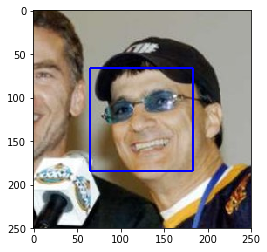

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[10])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

Percentage of human in human files =  99 %

Percentage of human in dog files =  18 %

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
noHumanInHumans = 0 
for img in human_files_short: 
    if(face_detector(img)): 
        noHumanInHumans+=1 

print("Percentage of human in human files = ", noHumanInHumans, "%")

noHumanInDogs = 0 
for img in dog_files_short: 
    if(face_detector(img)): 
        noHumanInDogs+=1 
print("Percentage of human in dog files = ", noHumanInDogs, "%")

Percentage of human in human files =  99 %
Percentage of human in dog files =  18 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from torch.autograd import Variable

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])
    image = Image.open(img_path).convert('RGB')
    image = data_transform(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)
    prediction = VGG16(image)
    #print(np.argmax(prediction.detach().numpy()))
    return np.argmax(prediction.detach().numpy()) # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    inx = VGG16_predict(img_path)
    #print(inx)
    if(inx >= 151 and inx<=268):
        return True # true/false
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

Percentage of dogs in human files =  0 %

Percentage of dogs in dog files =  86 %

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
noDogsInHumans = 0 
#print("dogs in human")
for img in human_files_short: 
    if(dog_detector(img)): 
        noDogsInHumans+=1 

print("Percentage of dogs in human files = ", noDogsInHumans, "%")

#print("dogs in dogs")
noDogsInDogs = 0 
for img in dog_files_short: 
    if(dog_detector(img)): 
        noDogsInDogs+=1 
print("Percentage of dogs in dog files = ", noDogsInDogs, "%")

Percentage of dogs in human files =  0 %
Percentage of dogs in dog files =  86 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


# define training, validation, and test data directories
data_dir = 'dogImages/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

# classes are folders in each directory with these names
no_classes = 133
classes =['Affenpinscher', 'Afghan hound', 'Airedale terrier', 'Akita','Alaskan malamute', 'American eskimo dog', 'American foxhound','American staffordshire terrier', 'American water spaniel', 'Anatolian shepherd dog',
'Australian cattle dog', 'Australian shepherd', 'Australian terrier', 'Basenji', 'Basset hound', 'Beagle', 'Bearded collie', 'Beauceron', 'Bedlington terrier', 'Belgian malinois',
'Belgian sheepdog','Belgian tervuren','Bernese mountain dog','Bichon frise','Black and tan coonhound','Black russian terrier','Bloodhound','Bluetick coonhound','Border collie','Border terrier',
'Borzoi','Boston terrier','Bouvier des flandres','Boxer','Boykin spaniel','Briard','Brittany','Brussels griffon','Bull terrier','Bulldog',
'Bullmastiff','Cairn terrier','Canaan dog','Cane corso','Cardigan welsh corgi','Cavalier king charles spaniel','Chesapeake bay retriever','Chihuahua','Chinese crested','Chinese shar-pei',
'Chow chow','Clumber spaniel','Cocker spaniel','Collie','Curly-coated retriever','Dachshund','Dalmatian','Dandie dinmont terrier','Doberman pinscher','Dogue de bordeaux',
'English cocker spaniel','English setter','English springer spaniel','English toy spaniel','Entlebucher mountain dog','Field spaniel','Finnish spitz','Flat-coated retriever','French bulldog','German pinscher',
'German shepherd dog','German shorthaired pointer','German wirehaired pointer','Giant schnauzer','Glen of imaal terrier','Golden retriever','Gordon setter','Great dane','Great pyrenees','Greater swiss mountain dog',
'Greyhound','Havanese','Ibizan hound','Icelandic sheepdog','Irish red and white setter','Irish setter','Irish terrier','Irish water spaniel','Irish wolfhound','Italian greyhound',
'Japanese chin','Keeshond','Kerry blue terrier','Komondor','Kuvasz','Labrador retriever','Lakeland terrier','Leonberger','Lhasa apso','Lowchen',
'Maltese','Manchester terrier','Mastiff','Miniature schnauzer','Neapolitan mastiff','Newfoundland','Norfolk terrier','Norwegian buhund','Norwegian elkhound','Norwegian lundehund',
'Norwich terrier','Nova scotia duck tolling retriever','Old english sheepdog','Otterhound','Papillon','Parson russell terrier','Pekingese','Pembroke welsh corgi','Petit basset griffon vendeen','Pharaoh hound',
'Plott','Pointer','Pomeranian','Poodle','Portuguese water dog','Saint bernard','Silky terrier','Smooth fox terrier','Tibetan mastiff','Welsh springer spaniel','Wirehaired pointing griffon','Xoloitzcuintli','Yorkshire terrier']


In [12]:
#https://pytorch.org/docs/stable/torchvision/transforms.html
train_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                     transforms.RandomVerticalFlip(p=0.5),
                                     #transforms.ColorJitter(brightness=0.2, contrast=0.1, saturation=0, hue=0),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.3, 0.3, 0.3])]) #https://becominghuman.ai/image-data-pre-processing-for-neural-networks-498289068258

valid_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.3, 0.3, 0.3])])

test_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.3, 0.3, 0.3])])


train_data = datasets.ImageFolder(train_dir, transform=train_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))                                  
print('Num test images: ', len(test_data))

Num training images:  6680
Num validation images:  835
Num test images:  836


In [13]:
batch_size = 32
num_workers = 0

In [14]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True) #https://pytorch.org/docs/stable/data.html
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)


loaders_scratch = {'train':train_loader,
                   'valid':valid_loader,
                   'test':test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

1) I have done the resizing by cropping the image, namely by using RandomResizedCrop which crops the given PIL Image to random size and aspect ratio.

2) Given that the dataset is small, I have tried several augmentation methods in the hope that this will improve the model accuracy but that resulted in bad accuracy of the model. In the end I have used only RandomVerticalFlip with the training data which vertically flips the given PIL Image randomly with a given probability.



### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
import torch.nn as nn
import torch.nn.functional as F
ImageFile.LOAD_TRUNCATED_IMAGES = True

# define the CNN architecture
#https://discuss.pytorch.org/t/valueerror-expected-input-batch-size-324-to-match-target-batch-size-4/24498
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1, stride=2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1, stride=2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (128 * 7 * 7 -> 500)
        self.fc1 = nn.Linear(128* 7* 7, 500)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(500, no_classes)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        #print(x.shape)
        # flatten image input
        x = x.view(-1, 7 * 7 *128)
        #print(x.shape)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x


In [16]:
#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

1) I have tested with several models, I started by using CNN with 5 ConvNet layers, max pooling layers between every ConvNet layer and also used dropout (p =0.5) but accurcy did not exceed 1%. 
2) I tried simpiler model but not very wide, namely it was a network with 3 ConvNet layers (the widest it got was 64 dimension) with max pooling layers and dropout (p = 0.5). This again failed to exceed 3% of accuracy. 
3) I tried a small but wide network and I have minimized the dropout ratio to (0.25). Here is the network architecture: 

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)

This model has worked and gave an accuracy of 13%. 

With all the mentioed models, I tested with several optimizers such as Adam, SGD, and Adagrad. I found that for this case SGD works best. 

I have kept some of the training cells of the models I tested in the notebook and kept the chosen model as the last one. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [17]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.04)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [20]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# number of epochs to train the model
n_epochs = 10

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        running_loss = 0.0
        vali_running_loss = 0.0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            #forward pass
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            #backward pass
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
            # print statistics - https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
            running_loss += loss.item()
            if batch_idx % 100 == 99:    # print every 100 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, batch_idx + 1, running_loss / 100))
                running_loss = 0.0
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            vali_running_loss += loss.item()
            if batch_idx % 10 == 9:    # print every 100 mini-batches
                print('[%d, %5d] valid loss: %.3f' %
                      (epoch + 1, batch_idx + 1, vali_running_loss / 10))
                vali_running_loss = 0.0
        # calculate average losses
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(valid_loader.dataset)
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model_scratch1.pt')
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
# model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
#                       criterion_scratch, use_cuda, 'model_scratch.pt')

# # load the model that got the best validation accuracy
# model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [21]:
# train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch5.pt')

[2,   100] loss: 4.872
[2,   200] loss: 4.858
[2,    10] valid loss: 4.834
[2,    20] valid loss: 4.808
[2,    30] valid loss: 4.850
[2,    40] valid loss: 4.821
[2,    50] valid loss: 4.837
[2,    60] valid loss: 4.808
[2,    70] valid loss: 4.819
[2,    80] valid loss: 4.841
[2,    90] valid loss: 4.805
[2,   100] valid loss: 4.803
[2,   110] valid loss: 4.814
[2,   120] valid loss: 4.819
[2,   130] valid loss: 4.814
[2,   140] valid loss: 4.813
[2,   150] valid loss: 4.819
[2,   160] valid loss: 4.812
[2,   170] valid loss: 4.820
[2,   180] valid loss: 4.826
[2,   190] valid loss: 4.821
[2,   200] valid loss: 4.809
Epoch: 1 	Training Loss: 4.863975 	Validation Loss: 4.819808
Validation loss decreased (inf --> 4.819808).  Saving model ...
[3,   100] loss: 4.818
[3,   200] loss: 4.774
[3,    10] valid loss: 4.735
[3,    20] valid loss: 4.684
[3,    30] valid loss: 4.707
[3,    40] valid loss: 4.669
[3,    50] valid loss: 4.668
[3,    60] valid loss: 4.719
[3,    70] valid loss: 4.720


In [24]:
model_scratch.load_state_dict(torch.load('model_scratch1.pt'))
#Test accuracy was 3%


In [26]:
# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch9.pt')

[2,   100] loss: 4.431
[2,   200] loss: 4.427
[2,    10] valid loss: 4.352
[2,    20] valid loss: 4.488
[2,    30] valid loss: 4.312
[2,    40] valid loss: 4.448
[2,    50] valid loss: 4.401
[2,    60] valid loss: 4.363
[2,    70] valid loss: 4.444
[2,    80] valid loss: 4.341
[2,    90] valid loss: 4.357
[2,   100] valid loss: 4.477
[2,   110] valid loss: 4.349
[2,   120] valid loss: 4.438
[2,   130] valid loss: 4.386
[2,   140] valid loss: 4.338
[2,   150] valid loss: 4.378
[2,   160] valid loss: 4.335
[2,   170] valid loss: 4.391
[2,   180] valid loss: 4.445
[2,   190] valid loss: 4.419
[2,   200] valid loss: 4.398
Epoch: 1 	Training Loss: 4.432050 	Validation Loss: 4.392167
Validation loss decreased (inf --> 4.392167).  Saving model ...
[3,   100] loss: 4.395
[3,   200] loss: 4.377
[3,    10] valid loss: 4.392
[3,    20] valid loss: 4.340
[3,    30] valid loss: 4.251
[3,    40] valid loss: 4.270
[3,    50] valid loss: 4.343
[3,    60] valid loss: 4.419
[3,    70] valid loss: 4.294


[13,   200] loss: 4.066
[13,    10] valid loss: 4.058
[13,    20] valid loss: 4.180
[13,    30] valid loss: 4.129
[13,    40] valid loss: 4.129
[13,    50] valid loss: 4.099
[13,    60] valid loss: 4.010
[13,    70] valid loss: 4.045
[13,    80] valid loss: 4.129
[13,    90] valid loss: 4.025
[13,   100] valid loss: 4.057
[13,   110] valid loss: 3.902
[13,   120] valid loss: 4.056
[13,   130] valid loss: 3.944
[13,   140] valid loss: 4.108
[13,   150] valid loss: 4.035
[13,   160] valid loss: 4.142
[13,   170] valid loss: 4.013
[13,   180] valid loss: 4.184
[13,   190] valid loss: 3.989
[13,   200] valid loss: 4.035
Epoch: 12 	Training Loss: 4.049784 	Validation Loss: 4.060645
[14,   100] loss: 4.021
[14,   200] loss: 4.004
[14,    10] valid loss: 3.734
[14,    20] valid loss: 3.843
[14,    30] valid loss: 3.856
[14,    40] valid loss: 3.784
[14,    50] valid loss: 3.901
[14,    60] valid loss: 3.819
[14,    70] valid loss: 3.924
[14,    80] valid loss: 3.965
[14,    90] valid loss: 3.

In [28]:
model_scratch.load_state_dict(torch.load('model_scratch1.pt')) #Test accuracy was 9%

In [27]:
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch1.pt')

[2,   100] loss: 3.869
[2,   200] loss: 3.887
[2,    10] valid loss: 3.715
[2,    20] valid loss: 3.811
[2,    30] valid loss: 3.751
[2,    40] valid loss: 3.676
[2,    50] valid loss: 3.672
[2,    60] valid loss: 3.666
[2,    70] valid loss: 3.744
[2,    80] valid loss: 3.702
[2,    90] valid loss: 3.793
[2,   100] valid loss: 3.683
[2,   110] valid loss: 3.652
[2,   120] valid loss: 3.599
[2,   130] valid loss: 3.815
[2,   140] valid loss: 3.789
[2,   150] valid loss: 3.740
[2,   160] valid loss: 3.757
[2,   170] valid loss: 3.744
[2,   180] valid loss: 3.620
[2,   190] valid loss: 3.776
[2,   200] valid loss: 3.636
Epoch: 1 	Training Loss: 3.869846 	Validation Loss: 3.714098
Validation loss decreased (inf --> 3.714098).  Saving model ...
[3,   100] loss: 3.829
[3,   200] loss: 3.808
[3,    10] valid loss: 3.855
[3,    20] valid loss: 3.618
[3,    30] valid loss: 3.728
[3,    40] valid loss: 3.702
[3,    50] valid loss: 3.695
[3,    60] valid loss: 3.828
[3,    70] valid loss: 3.792


[13,    70] valid loss: 3.401
[13,    80] valid loss: 3.453
[13,    90] valid loss: 3.466
[13,   100] valid loss: 3.492
[13,   110] valid loss: 3.355
[13,   120] valid loss: 3.505
[13,   130] valid loss: 3.538
[13,   140] valid loss: 3.383
[13,   150] valid loss: 3.398
[13,   160] valid loss: 3.456
[13,   170] valid loss: 3.448
[13,   180] valid loss: 3.405
[13,   190] valid loss: 3.571
[13,   200] valid loss: 3.433
Epoch: 12 	Training Loss: 3.560736 	Validation Loss: 3.451988
[14,   100] loss: 3.520
[14,   200] loss: 3.559
[14,    10] valid loss: 3.276
[14,    20] valid loss: 3.404
[14,    30] valid loss: 3.356
[14,    40] valid loss: 3.164
[14,    50] valid loss: 3.432
[14,    60] valid loss: 3.253
[14,    70] valid loss: 3.221
[14,    80] valid loss: 3.251
[14,    90] valid loss: 3.338
[14,   100] valid loss: 3.409
[14,   110] valid loss: 3.375
[14,   120] valid loss: 3.247
[14,   130] valid loss: 3.300
[14,   140] valid loss: 3.164
[14,   150] valid loss: 3.358
[14,   160] valid lo

[24,    90] valid loss: 3.011
[24,   100] valid loss: 2.914
[24,   110] valid loss: 3.013
[24,   120] valid loss: 3.052
[24,   130] valid loss: 3.080
[24,   140] valid loss: 3.025
[24,   150] valid loss: 2.879
[24,   160] valid loss: 3.050
[24,   170] valid loss: 3.022
[24,   180] valid loss: 3.092
[24,   190] valid loss: 3.006
[24,   200] valid loss: 3.130
Epoch: 23 	Training Loss: 3.309757 	Validation Loss: 3.013808
Validation loss decreased (3.115757 --> 3.013808).  Saving model ...
[25,   100] loss: 3.251
[25,   200] loss: 3.330
[25,    10] valid loss: 2.970
[25,    20] valid loss: 3.100
[25,    30] valid loss: 3.058
[25,    40] valid loss: 3.103
[25,    50] valid loss: 3.054
[25,    60] valid loss: 3.100
[25,    70] valid loss: 3.027
[25,    80] valid loss: 3.126
[25,    90] valid loss: 2.962
[25,   100] valid loss: 3.073
[25,   110] valid loss: 3.139
[25,   120] valid loss: 2.923
[25,   130] valid loss: 3.060
[25,   140] valid loss: 3.072
[25,   150] valid loss: 3.058
[25,   160]

In [65]:
model_scratch.load_state_dict(torch.load('model_scratch.pt')) #Test accuracy was %13

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [30]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.832758


Test Accuracy: 13% (111/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [31]:
## TODO: Specify data loaders
loaders_transfer = {'train':train_loader,
                   'valid':valid_loader,
                   'test':test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [46]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg19(pretrained=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

In [47]:
# Freeze training for all "features" layers
for param in model_transfer.parameters():
    param.requires_grad = False

In [48]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

In [49]:
print(model_transfer.classifier[6].in_features) 
print(model_transfer.classifier[6].out_features)

4096
1000


In [50]:
# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

In [52]:
n_inputs = model_transfer.classifier[6].in_features

# add last linear layer (n_inputs -> 133 dogs classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, no_classes)

model_transfer.classifier[6] = last_layer

# if GPU is available, move the model to GPU
# if train_on_gpu:
#     model_transfer.cuda()

# check to see that your last layer produces the expected number of outputs
print(model_transfer.classifier[6].out_features)

133


In [53]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Given that this is an image classification problem, I  searched for the best available, pre-trained models. There were many choices for this task such as AlexNet, VGG16, VGG19, ResNet, and Inception v3. 

I chose VGG19 which has won the first place for the localization and the second place for the classification in the ImageNet Challenge in 2014. The model seemed to be very effective and its 2015 ICLR paper has more than 14000 citations. I found it suitable because of two reasons. First, it shows excellent performance for image classification. Second, the model is not as deep as other models such as Inception vs (although it is wide) and based on my experience with the training from scratch, it seems that a very deep model might not work as good as a shallower one. I also liked the idea that VGG 19 uses 3×3 Filters which are relatively small. 
Furthermore, I will be using the network as a feature extractor and the main training will be for the classifier thus a very complicated model might not work as good as I need (since it was trained on imageNet with different classes). 


For the model I used, I deleted the last linear liner and I added a new one to fit with the number of classes that I have i.e. 133. I used categorical cross-entropy as my loss function and SGD as my optimizer. I intended to train the model for 20 epochs, but I terminated the training earlier since the loss was small enough to reach the required accuracy. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [55]:
# loss function = (categorical cross-entropy)
criterion_transfer = nn.CrossEntropyLoss()
# optimizer = (stochastic gradient descent) and learning rate = 0.001
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [43]:
#To fix an earlier issue with the train method -> path name 
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# number of epochs to train the model
n_epochs = 10

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        running_loss = 0.0
        vali_running_loss = 0.0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            #forward pass
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            #backward pass
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
            # print statistics - https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
            running_loss += loss.item()
            if batch_idx % 100 == 99:    # print every 100 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, batch_idx + 1, running_loss / 100))
                running_loss = 0.0
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            vali_running_loss += loss.item()
            if batch_idx % 10 == 9:    # print every 100 mini-batches
                print('[%d, %5d] valid loss: %.3f' %
                      (epoch + 1, batch_idx + 1, vali_running_loss / 10))
                vali_running_loss = 0.0
        # calculate average losses
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(valid_loader.dataset)
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


In [56]:
# train the model when using VGG19 -
n_epochs = 20
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer1.pt')

[2,   100] loss: 4.927
[2,   200] loss: 4.668
[2,    10] valid loss: 4.413
[2,    20] valid loss: 4.428
[2,    30] valid loss: 4.407
[2,    40] valid loss: 4.401
[2,    50] valid loss: 4.454
[2,    60] valid loss: 4.429
[2,    70] valid loss: 4.454
[2,    80] valid loss: 4.444
[2,    90] valid loss: 4.467
[2,   100] valid loss: 4.435
[2,   110] valid loss: 4.448
[2,   120] valid loss: 4.445
[2,   130] valid loss: 4.417
[2,   140] valid loss: 4.377
[2,   150] valid loss: 4.412
[2,   160] valid loss: 4.435
[2,   170] valid loss: 4.424
[2,   180] valid loss: 4.402
[2,   190] valid loss: 4.402
[2,   200] valid loss: 4.436
Epoch: 1 	Training Loss: 4.786377 	Validation Loss: 4.428239
Validation loss decreased (inf --> 4.428239).  Saving model ...
[3,   100] loss: 4.382
[3,   200] loss: 4.172
[3,    10] valid loss: 3.967
[3,    20] valid loss: 3.931
[3,    30] valid loss: 4.022
[3,    40] valid loss: 3.970
[3,    50] valid loss: 4.007
[3,    60] valid loss: 3.991
[3,    70] valid loss: 3.935


[12,   200] valid loss: 2.299
Epoch: 11 	Training Loss: 2.441326 	Validation Loss: 2.369487
Validation loss decreased (2.444535 --> 2.369487).  Saving model ...
[13,   100] loss: 2.431
[13,   200] loss: 2.320
[13,    10] valid loss: 2.287
[13,    20] valid loss: 2.233
[13,    30] valid loss: 2.451
[13,    40] valid loss: 2.362
[13,    50] valid loss: 2.202
[13,    60] valid loss: 2.292
[13,    70] valid loss: 2.194
[13,    80] valid loss: 2.324
[13,    90] valid loss: 2.114
[13,   100] valid loss: 2.264


KeyboardInterrupt: 

In [58]:
#load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [59]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.763642


Test Accuracy: 67% (563/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [60]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.


def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    #Preprocessing the image 
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])
    image = Image.open(img_path).convert('RGB')
    image = data_transform(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)
    prediction = model_transfer(image)
    #print(np.argmax(prediction.detach().numpy()))
    return np.argmax(prediction.detach().numpy()) # predicted class index

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [61]:
def predictedBreed(img_path):
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])
    image = Image.open(img_path).convert('RGB')
    image = data_transform(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)
    prediction = model_transfer(image)
    return np.argmax(prediction.detach().numpy()) # predicted class index

In [62]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
from matplotlib.pyplot import imshow
from PIL import Image
import matplotlib.pyplot as plt


def run_app(img_path):
    pil_im = Image.open(img_path, 'r')
    imshow(np.asarray(pil_im))
    ## handle cases for a human face, dog, and neither
    #Check if the image if for a human 
    if(face_detector(img_path)):
        #print("This is a human ... ")
        #print("Finding the resembling dog ... ")
        #Find the dog 
        res = predictedBreed(img_path)
        output = "This is a human ... \nFinding the resembling dog ... \nThis human looks like: "+  str(classes[res]) + "\n"
        #print("This human looks like: " + str(classes[res]))
        #print()
    elif(dog_detector(img_path)):
        #print("")
        #print("")
        #find the dog 
        res = predictedBreed(img_path) 
        output = "This is prob a dog ...\nThe dog breed is ... "+  str(classes[res]) +" \n"
    else:
        #print("did not detect a human or a dog...")
        output = "did not detect a human or a dog...\n"
    return output
    




---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Somewhat like my exceptations, it works well with difrerating dogs and human. 

Points for improvement: 
1) I could have used more training epochs to improve the model.  

2) Adding extra layers to the top of the network. 

3) Regularize the model more by adding batch normalization. 

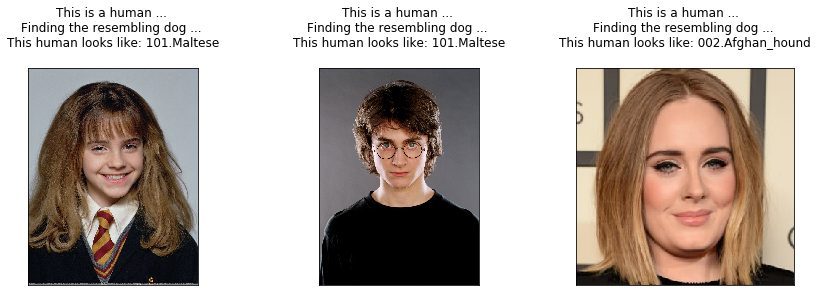

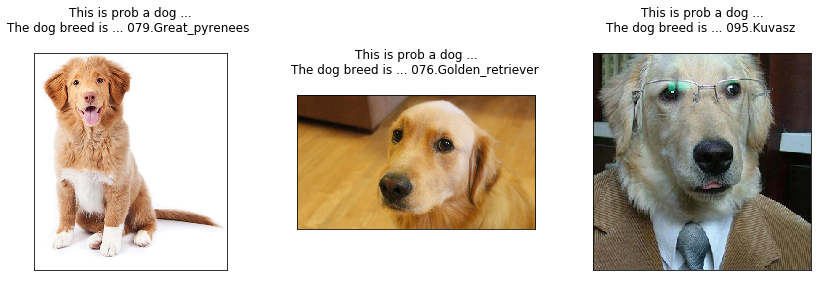

In [63]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
my_dog_files = ['dog1.jpg', 'dog2.jpg', 'dog3.jpg']
my_human_files = ['human3.jpg', 'human2.jpg', 'human1.jpg']
## suggested code, below
## suggested code, below
for position in range(len(my_human_files)):
    plt.subplot(1, 3, position+1)
    plt.imshow(np.asarray(Image.open(my_human_files[position], 'r')))
    plt.title(run_app(my_human_files[position]))
    plt.xticks([])
    plt.yticks([])

plt.subplots_adjust(left=None, bottom=None, right=2, top=None,
                wspace=None, hspace=None)    
plt.show()

for position in range(len(my_dog_files)):
    plt.subplot(1, 3, position+1)
    plt.imshow(np.asarray(Image.open(my_dog_files[position], 'r')))
    plt.title(run_app(my_dog_files[position]))
    plt.xticks([])
    plt.yticks([])

plt.subplots_adjust(left=None, bottom=None, right=2, top=None,
                wspace=None, hspace=None)    
plt.show()